# Transformer les données en images

## 1. Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = "darkgrid", palette = "colorblind")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import SMOTE

from joblib import dump, load # pour enregistrer et charger les modèles

n_coeurs = 4 # spécifie le nombre de coeurs utilisés sur le processeur par les fonctions qui le permettent

In [76]:
# Instanciation df
df = pd.read_csv('../../../../data/processed/model_weatherAUS.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df['Date'] = pd.to_datetime(df['Date'])

# Séparation data / target:
X = df.drop(columns = ['RainTomorrow', 'Date']).copy()
y = df['RainTomorrow'].copy()

# Séparation du jeu d'entrainement et du jeu de test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123, stratify = y)

# Scale de X_train, X_test:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
X_train[0]

array([0.5259434 , 0.58601134, 0.        , 0.03772277, 0.52895396,
       0.26330761, 0.        , 0.02298851, 0.92      , 0.63      ,
       0.61415907, 0.62149191, 0.66666667, 0.77777778, 0.54427646,
       0.58733205, 0.        , 0.4       , 0.09090909, 0.8       ,
       0.10416667, 0.35353438, 0.34299995, 0.58333333, 0.12344055,
       0.69391356, 0.        , 0.375     ])

In [78]:
X_train = X_train.reshape((-1, 4, 7, 1))
X_test = X_test.reshape((-1, 4, 7, 1))
print(X_train.shape)
print(X_test.shape)

(105590, 4, 7, 1)
(35197, 4, 7, 1)


In [79]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [80]:
y_train[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

## 2.Visualisation des images:

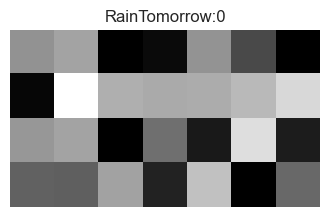

In [81]:
img = X_train[0, :, :, :]
plt.figure(figsize = (4, 4))
plt.imshow(img, cmap = "gray")
plt.title("RainTomorrow:" + str(y_train[0]))
plt.axis('off')

plt.show()

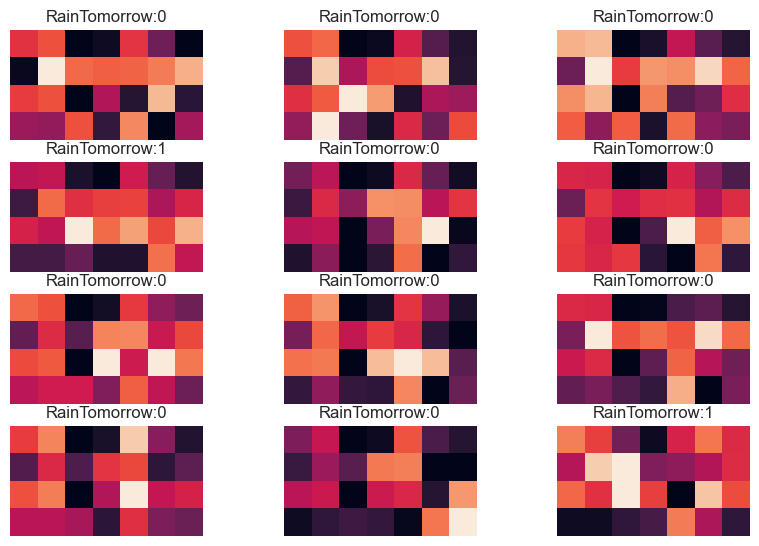

In [47]:
#Affichage d'images
number_of_images = 12 # Définir le nombre  d'images à afficher
plt.figure(figsize=(10,10))

for i in range(number_of_images):
    plt.subplot(int(number_of_images/2),3,i+1)
    plt.title("RainTomorrow:" + str(y_train[i]))
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :])

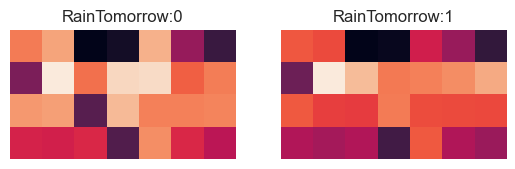

In [67]:
# Images moyennes correspondant au beau temps(0) et à la pluie (1):
for i in range(2):
    # Sélection des lignes de X_train correspondant au label i
    t = X_train[y_train == i]

    # Calcul de l'image moyenne
    img = t.mean(axis=0)

    # Affichage de l'image dans le i+1-ème emplacement d'une grille de figures
    # à 1 ligne et 2 colonnes.
    plt.subplot(1, 2, i+1)
    plt.imshow(img, interpolation='None')
    plt.title("RainTomorrow:" + str(i))
    plt.axis('off')

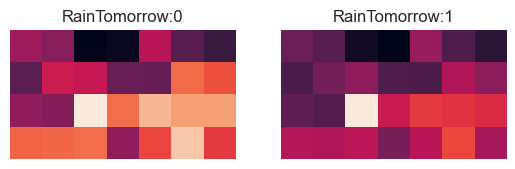

In [71]:
# Variations moyennes:
for i in range(2):
    # Sélection des lignes de X_train correspondant au label i
    t = X_train[y_train == i]

    # Calcul de l'image moyenne
    img = t.std(axis=0)

    # Affichage de l'image dans le i+1-ème emplacement d'une grille de figures
    # à 1 ligne et 2 colonnes.
    plt.subplot(1, 2, i+1)
    plt.imshow(img, interpolation='None')
    plt.title("RainTomorrow:" + str(i))
    plt.axis('off')